# import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# đọc dữ liệu

In [2]:
data = pd.read_csv('data\ApartmentTrading.csv')
data.head()
data['ten_quan'].unique()

array(['Quận Ba Đình', 'Ba Đình', 'Quận Hà Đông', 'Hà Đông', 'Ba Vì',
       'Huyện Đan Phượng', 'Đan Phượng', 'Huyện Hoài Đức', 'Hoài Đức',
       'Huyện Quốc Oai', 'Huyện Thạch Thất', 'Huyện Chương Mỹ',
       'Huyện Thanh Oai', 'Huyện Thường Tín', 'Quận Hoàn Kiếm',
       'Quận Tây Hồ', 'Tây Hồ', 'Quận Long Biên', 'Long Biên',
       'Quận Cầu Giấy', 'Cầu Giấy', 'Quận Đống Đa', 'Đống Đa',
       'Quận Hai Bà Trưng', 'Hai Bà Trưng', 'Quận Hoàng Mai', 'Hoàng Mai',
       'Quận Thanh Xuân', 'Thanh Xuân', 'Huyện Sóc Sơn', 'Huyện Đông Anh',
       'Đông Anh', 'Huyện Gia Lâm', 'Gia Lâm', 'Quận Nam Từ Liêm',
       'Nam Từ Liêm', 'Huyện Thanh Trì', 'Thanh Trì', 'Quận Bắc Từ Liêm',
       'Bắc Từ Liêm', 'Huyện Mê Linh', 'Huyện Phú Xuyên'], dtype=object)

In [3]:

data['ten_quan'].replace('Hoàng Mai','Quận Hoàng Mai',inplace=True)
data['ten_quan'].unique()

array(['Quận Ba Đình', 'Ba Đình', 'Quận Hà Đông', 'Hà Đông', 'Ba Vì',
       'Huyện Đan Phượng', 'Đan Phượng', 'Huyện Hoài Đức', 'Hoài Đức',
       'Huyện Quốc Oai', 'Huyện Thạch Thất', 'Huyện Chương Mỹ',
       'Huyện Thanh Oai', 'Huyện Thường Tín', 'Quận Hoàn Kiếm',
       'Quận Tây Hồ', 'Tây Hồ', 'Quận Long Biên', 'Long Biên',
       'Quận Cầu Giấy', 'Cầu Giấy', 'Quận Đống Đa', 'Đống Đa',
       'Quận Hai Bà Trưng', 'Hai Bà Trưng', 'Quận Hoàng Mai',
       'Quận Thanh Xuân', 'Thanh Xuân', 'Huyện Sóc Sơn', 'Huyện Đông Anh',
       'Đông Anh', 'Huyện Gia Lâm', 'Gia Lâm', 'Quận Nam Từ Liêm',
       'Nam Từ Liêm', 'Huyện Thanh Trì', 'Thanh Trì', 'Quận Bắc Từ Liêm',
       'Bắc Từ Liêm', 'Huyện Mê Linh', 'Huyện Phú Xuyên'], dtype=object)

# lấy thông tin của quận hoàng mai

In [4]:
# lấy thông tin của quận hoàng mai
data = data.loc[data['ten_quan']=='Quận Hoàng Mai'].reset_index(drop=True)
data.shape

(3120, 25)

In [5]:
# kiểm tra dữ liệu bị thiếu
data.isnull().sum()

Unnamed: 0             0
dien_tich            109
huong_ban_cong      1810
phong_ngu            644
id_thanh_pho           0
ten_thanh_pho          0
id_quan                0
ten_quan               0
so_tang             2891
mat_tien            3104
noi_that            1907
huong_nha           1694
so_do               1725
lat                    5
long                   5
gia                  372
gia_m2               390
du_an               2536
project_name        2536
id_duong             122
ten_duong            122
do_rong_duong       3058
do_rong_duong_ml    3055
id_phuong            501
ten_phuong           507
dtype: int64

In [6]:
# xoá những dữ liệu 'giá' bị thiếu
data = data.dropna(subset =['gia'])
data.isna().sum()

Unnamed: 0             0
dien_tich             56
huong_ban_cong      1566
phong_ngu            528
id_thanh_pho           0
ten_thanh_pho          0
id_quan                0
ten_quan               0
so_tang             2524
mat_tien            2732
noi_that            1681
huong_nha           1459
so_do               1438
lat                    4
long                   4
gia                    0
gia_m2                68
du_an               2241
project_name        2241
id_duong             118
ten_duong            118
do_rong_duong       2687
do_rong_duong_ml    2684
id_phuong            440
ten_phuong           446
dtype: int64

In [7]:
# sửa dữ liệu phong ngủ NaN thành 1
data['phong_ngu'] = data['phong_ngu'].fillna(1)
data.isna().sum()

Unnamed: 0             0
dien_tich             56
huong_ban_cong      1566
phong_ngu              0
id_thanh_pho           0
ten_thanh_pho          0
id_quan                0
ten_quan               0
so_tang             2524
mat_tien            2732
noi_that            1681
huong_nha           1459
so_do               1438
lat                    4
long                   4
gia                    0
gia_m2                68
du_an               2241
project_name        2241
id_duong             118
ten_duong            118
do_rong_duong       2687
do_rong_duong_ml    2684
id_phuong            440
ten_phuong           446
dtype: int64

In [8]:
# sửa dữ liệu sổ đỏ NaN thành 0
data['so_do'] = data['so_do'].fillna(0)
data.isna().sum()

Unnamed: 0             0
dien_tich             56
huong_ban_cong      1566
phong_ngu              0
id_thanh_pho           0
ten_thanh_pho          0
id_quan                0
ten_quan               0
so_tang             2524
mat_tien            2732
noi_that            1681
huong_nha           1459
so_do                  0
lat                    4
long                   4
gia                    0
gia_m2                68
du_an               2241
project_name        2241
id_duong             118
ten_duong            118
do_rong_duong       2687
do_rong_duong_ml    2684
id_phuong            440
ten_phuong           446
dtype: int64

In [9]:
data['so_do'].unique()

array([0, 'Sổ hồng', 'Sổ đỏ', 'Hợp đồng mua bán', 'Giấy tờ hợp lệ',
       'Sổ hồng/ Sổ đỏ', 'Hợp đồng mua bán.', 'Đã có sổ đỏ chính chủ.',
       'Đang chờ sổ', 'Sổ đỏ chính chủ.', 'Đã có sổ đỏ.',
       'Sổ hồng lâu dài vĩnh viễn.', 'Có sổ đỏ.', 'Sổ đỏ chính chủ',
       'Đã có sổ đỏ toàn dự án ạ.', 'Sổ hồng.', 'Đã có sổ hồng',
       'Sổ hồng chính chủ.', 'Đang làm sổ đỏ.', 'Đã có sổ.',
       'Đã có sổ hồng.', 'Có sổ đỏ', 'đã có sổ đỏ', 'Sổ hồng vĩnh viễn.',
       'Sổ đỏ vĩnh viễn.', 'HĐMB.', 'Sổ hồng vĩnh viễn', 'HĐMB',
       'Nhà đã có sổ đỏ.', 'Đã có sổ', 'Sổ hồng lâu dài vĩnh viễn',
       'Sổ đỏ.', 'Có sổ.', 'Đã có sổ đỏ', 'Sổ đỏ lâu dài vĩnh viễn',
       'Có sổ hồng.', 'Đã được phê duyệt.', 'tháng 2/2022 nhận nhà',
       'đã có sổ đỏ chính chủ sẵn sàng giao dịch', 'sổ đỏ chính chủ',
       'Sổ đỏ lâu dài', '- Đã có sổ đỏ.', 'Sổ hồng vĩnh viễn', 'Hđcc',
       'Sổ hồng lâu dài.', 'Đã có sổ Hồng',
       'Đã phê duyệt quyết định đầu tư', 'Sổ Hồng Lâu dài vĩnh viễn',
   

In [10]:
# đổi các giá trị khác không(0) thành có(1) :)
for i in data['so_do'].unique():
    if i != 0:
        data['so_do'].replace(i,1,inplace=True)
data['so_do'].unique()

array([0, 1], dtype=int64)

In [11]:
data.isna().sum()

Unnamed: 0             0
dien_tich             56
huong_ban_cong      1566
phong_ngu              0
id_thanh_pho           0
ten_thanh_pho          0
id_quan                0
ten_quan               0
so_tang             2524
mat_tien            2732
noi_that            1681
huong_nha           1459
so_do                  0
lat                    4
long                   4
gia                    0
gia_m2                68
du_an               2241
project_name        2241
id_duong             118
ten_duong            118
do_rong_duong       2687
do_rong_duong_ml    2684
id_phuong            440
ten_phuong           446
dtype: int64

In [12]:
# sửa dữ liệu nội thất NaN thành không(0)
data['noi_that'] = data['noi_that'].fillna(0)
data.isna().sum()

Unnamed: 0             0
dien_tich             56
huong_ban_cong      1566
phong_ngu              0
id_thanh_pho           0
ten_thanh_pho          0
id_quan                0
ten_quan               0
so_tang             2524
mat_tien            2732
noi_that               0
huong_nha           1459
so_do                  0
lat                    4
long                   4
gia                    0
gia_m2                68
du_an               2241
project_name        2241
id_duong             118
ten_duong            118
do_rong_duong       2687
do_rong_duong_ml    2684
id_phuong            440
ten_phuong           446
dtype: int64

In [13]:
# đổi các giá trị khác không'0' thành có'1' :)
for i in data['noi_that'].unique():
    if i != 0:
        data['noi_that'].replace(i,1,inplace=True)
data['noi_that'].unique()

array([0, 1], dtype=int64)

In [14]:
# sửa dữ liệu mặt tiền NaN thành 0
data['mat_tien'] = data['mat_tien'].fillna(0)
data.isna().sum()

Unnamed: 0             0
dien_tich             56
huong_ban_cong      1566
phong_ngu              0
id_thanh_pho           0
ten_thanh_pho          0
id_quan                0
ten_quan               0
so_tang             2524
mat_tien               0
noi_that               0
huong_nha           1459
so_do                  0
lat                    4
long                   4
gia                    0
gia_m2                68
du_an               2241
project_name        2241
id_duong             118
ten_duong            118
do_rong_duong       2687
do_rong_duong_ml    2684
id_phuong            440
ten_phuong           446
dtype: int64

In [15]:
# sửa dữ liệu số tầng NaN thành 0
data['so_tang'] = data['so_tang'].fillna(1)
data.isna().sum()

Unnamed: 0             0
dien_tich             56
huong_ban_cong      1566
phong_ngu              0
id_thanh_pho           0
ten_thanh_pho          0
id_quan                0
ten_quan               0
so_tang                0
mat_tien               0
noi_that               0
huong_nha           1459
so_do                  0
lat                    4
long                   4
gia                    0
gia_m2                68
du_an               2241
project_name        2241
id_duong             118
ten_duong            118
do_rong_duong       2687
do_rong_duong_ml    2684
id_phuong            440
ten_phuong           446
dtype: int64

In [16]:
# sửa dữ liệu dự án NaN thành 0
data['du_an'] = data['du_an'].fillna(0)

# đổi các giá trị khác '0' thành '1' :)
for i in data['du_an'].unique():
    if i != 0:
        data['du_an'].replace(i,1,inplace=True)
data['du_an'].unique()

array([0, 1], dtype=int64)

In [17]:
# xoá những dữ liệu 'dien_tich' bị thiếu
data = data.dropna(subset =['dien_tich'])
data.isna().sum()

Unnamed: 0             0
dien_tich              0
huong_ban_cong      1519
phong_ngu              0
id_thanh_pho           0
ten_thanh_pho          0
id_quan                0
ten_quan               0
so_tang                0
mat_tien               0
noi_that               0
huong_nha           1410
so_do                  0
lat                    4
long                   4
gia                    0
gia_m2                13
du_an                  0
project_name        2192
id_duong             118
ten_duong            118
do_rong_duong       2632
do_rong_duong_ml    2629
id_phuong            424
ten_phuong           430
dtype: int64

In [18]:
# bỏ đi những coulmns bị thiếu 50% dữ liệu
null_rate = data.isnull().sum() / data.shape[0]
a = null_rate[null_rate > 0.5]
data = data.drop(a.index,axis = 1)
data.columns

Index(['Unnamed: 0', 'dien_tich', 'phong_ngu', 'id_thanh_pho', 'ten_thanh_pho',
       'id_quan', 'ten_quan', 'so_tang', 'mat_tien', 'noi_that', 'so_do',
       'lat', 'long', 'gia', 'gia_m2', 'du_an', 'id_duong', 'ten_duong',
       'id_phuong', 'ten_phuong'],
      dtype='object')

In [19]:
# xoá những columns ảnh hưởng
data = data.drop(['id_duong','id_phuong','id_quan','id_thanh_pho','gia_m2','Unnamed: 0'],axis = 1)
data.columns

Index(['dien_tich', 'phong_ngu', 'ten_thanh_pho', 'ten_quan', 'so_tang',
       'mat_tien', 'noi_that', 'so_do', 'lat', 'long', 'gia', 'du_an',
       'ten_duong', 'ten_phuong'],
      dtype='object')

In [20]:
data = pd.get_dummies(data,columns = ['ten_thanh_pho','ten_quan','ten_duong','ten_phuong'],dummy_na = True)


In [21]:
data.columns

Index(['dien_tich', 'phong_ngu', 'so_tang', 'mat_tien', 'noi_that', 'so_do',
       'lat', 'long', 'gia', 'du_an', 'ten_thanh_pho_Hà Nội',
       'ten_thanh_pho_Thành phố Hà Nội', 'ten_thanh_pho_nan',
       'ten_quan_Quận Hoàng Mai', 'ten_quan_nan', 'ten_duong_Linh Đường',
       'ten_duong_Ngọc Hồi', 'ten_duong_Phố Thanh Đàm',
       'ten_duong_Phố Trần Điền', 'ten_duong_Phố Tương Mai',
       'ten_duong_Phố Vũ Tông Phan', 'ten_duong_Phố Yên Duyên',
       'ten_duong_Đường Bùi Xương Trạch', 'ten_duong_Đường Bằng Liệt',
       'ten_duong_Đường Giáp Nhị', 'ten_duong_Đường Giải Phóng',
       'ten_duong_Đường Hoàng Liệt', 'ten_duong_Đường Hoàng Mai',
       'ten_duong_Đường Kim Giang', 'ten_duong_Đường Linh Đàm',
       'ten_duong_Đường Linh Đường', 'ten_duong_Đường Lĩnh Nam',
       'ten_duong_Đường Lương Khánh Thiện', 'ten_duong_Đường Mai Động',
       'ten_duong_Đường Minh Khai', 'ten_duong_Đường Nghiêm Xuân Yêm',
       'ten_duong_Đường Nguyễn An Ninh', 'ten_duong_Đường Nguyễn Chính

In [22]:
data.isna().sum()

dien_tich                      0
phong_ngu                      0
so_tang                        0
mat_tien                       0
noi_that                       0
                              ..
ten_phuong_Phường Vĩnh Hưng    0
ten_phuong_Phường Yên Sở       0
ten_phuong_Phường Đại Kim      0
ten_phuong_Phường Định Công    0
ten_phuong_nan                 0
Length: 86, dtype: int64

In [23]:
data['lat'] = data['lat'].fillna(data['lat'].mean())
data['long'] = data['long'].fillna(data['long'].mean())
data.isna().sum()

dien_tich                      0
phong_ngu                      0
so_tang                        0
mat_tien                       0
noi_that                       0
                              ..
ten_phuong_Phường Vĩnh Hưng    0
ten_phuong_Phường Yên Sở       0
ten_phuong_Phường Đại Kim      0
ten_phuong_Phường Định Công    0
ten_phuong_nan                 0
Length: 86, dtype: int64

In [24]:
data.head()

,dien_tich,phong_ngu,so_tang,mat_tien,noi_that,so_do,lat,long,gia,du_an,...,ten_phuong_Phường Thanh Trì,ten_phuong_Phường Thịnh Liệt,ten_phuong_Phường Trần Phú,ten_phuong_Phường Tân Mai,ten_phuong_Phường Tương Mai,ten_phuong_Phường Vĩnh Hưng,ten_phuong_Phường Yên Sở,ten_phuong_Phường Đại Kim,ten_phuong_Phường Định Công,ten_phuong_nan
1,100.0,1.0,1.0,0.0,0,0,20.970731,105.872741,2900.0,0,...,0,0,0,0,0,0,1,0,0,0
2,65.0,2.0,41.0,0.0,0,1,20.972826,105.820057,1150.0,0,...,0,0,0,0,0,0,0,0,0,1
3,121.0,3.0,1.0,0.0,0,0,20.983930,105.850975,3521.0,1,...,0,0,0,0,1,0,0,0,0,0
4,68.0,2.0,1.0,0.0,0,1,20.975110,105.869053,1650.0,0,...,0,0,0,0,0,0,1,0,0,0
5,70.0,2.0,11.0,0.0,0,1,20.962532,105.839913,1734.0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y = data['gia']
x = data.drop('gia',axis= 1)
x_train,x_valid,y_train,y_valid = train_test_split(data,y,train_size=0.8,test_size=0.2,random_state=0)

In [26]:

x_valid.head()

,dien_tich,phong_ngu,so_tang,mat_tien,noi_that,so_do,lat,long,gia,du_an,...,ten_phuong_Phường Thanh Trì,ten_phuong_Phường Thịnh Liệt,ten_phuong_Phường Trần Phú,ten_phuong_Phường Tân Mai,ten_phuong_Phường Tương Mai,ten_phuong_Phường Vĩnh Hưng,ten_phuong_Phường Yên Sở,ten_phuong_Phường Đại Kim,ten_phuong_Phường Định Công,ten_phuong_nan
740,70.0,3.0,1.0,0.0,0,1,20.981510,105.810409,1200.0,0,...,0,0,0,0,0,0,0,1,0,0
870,54.0,2.0,1.0,0.0,1,1,20.972411,105.819986,1100.0,0,...,0,0,0,0,0,0,0,1,0,0
2666,70.0,2.0,1.0,0.0,0,1,20.971364,105.828001,1500.0,0,...,0,0,0,0,0,1,0,0,0,0
2760,45.0,1.0,1.0,0.0,0,1,20.964532,105.831331,1170.0,0,...,0,0,0,0,0,0,0,0,0,0
480,97.0,3.0,1.0,0.0,0,0,20.962659,105.858586,2900.0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
y_valid.head()

740     1200.0
870     1100.0
2666    1500.0
2760    1170.0
480     2900.0
Name: gia, dtype: float64

In [28]:
# dự đoán giá
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(x_train,y_train)
y_preds = LR.predict(x_valid)
score=r2_score(y_valid,y_preds)

print('R2-score is ',score)
print('Mean_sqrd_error is==',mean_squared_error(y_valid,y_preds))
print('Root_mean_squared error of is==',np.sqrt(mean_squared_error(y_valid,y_preds)))

R2-score is  1.0
Mean_sqrd_error is== 1.3397293130697625e-09
Root_mean_squared error of is== 3.6602312946995066e-05


In [29]:
pd.DataFrame({'gia_that_su': y_valid[:50],'gia_du_doan' : y_preds[:50]})

,gia_that_su,gia_du_doan
740,1200.0,1200.000020
870,1100.0,1100.000008
2666,1500.0,1500.000014
2760,1170.0,1169.999973
480,2900.0,2900.000025
162,1800.0,1799.999993
1696,2700.0,2700.000032
981,1200.0,1199.999962
206,1800.0,1800.000004
2508,1400.0,1399.999980


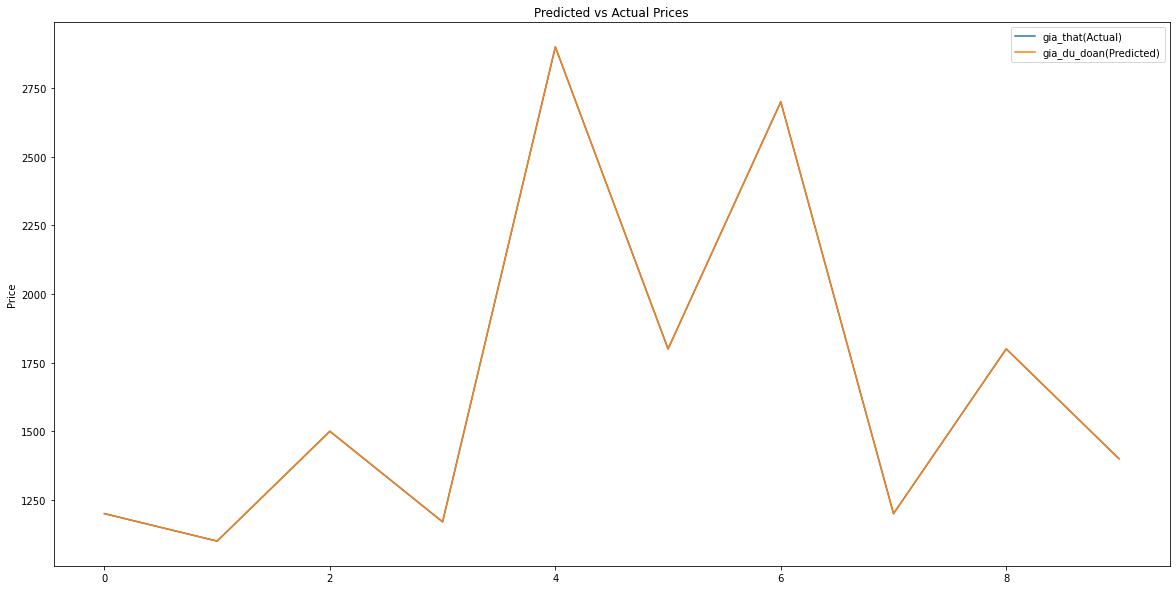

In [30]:
fig = plt.figure() 
fig.set_size_inches(20, 10)
plt.plot(y_valid[:10].values, label='gia_that(Actual)')
plt.plot(y_preds[:10], label='gia_du_doan(Predicted)')
plt.title(f"Predicted vs Actual Prices")
plt.ylabel("Price")
plt.legend()
plt.show()